# Data Science Regression Project: Predicting House Prices in Bengaluru 

In [159]:
## Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Data Load: Load Bengaluru home prices into a dataframe

In [160]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [161]:
df1.shape

(13320, 9)

In [162]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [163]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [164]:
for feature in df1.columns[:]:
    total_labels=len(df1[feature].value_counts())
    print('The total labels in',feature ,'are:', total_labels)

The total labels in area_type are: 4
The total labels in availability are: 81
The total labels in location are: 1305
The total labels in size are: 31
The total labels in society are: 2688
The total labels in total_sqft are: 2117
The total labels in bath are: 19
The total labels in balcony are: 4
The total labels in price are: 1994


### Removing feature that may not be required

In [165]:
df2=df1.drop(['area_type','availability','society'],axis='columns')
df2.head()


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [166]:
print('The shape of dataframe is',df2.shape)

The shape of dataframe is (13320, 6)


## Data Cleaning: Handle NAN values

In [167]:
## Finding missing value in the data set
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [168]:
##We can see that there are many missing values in balcony so we can replace it by central tendency of the values

## defining a function to replace the value
def impute_nan(df2,variable,cen_ten):
    df2[variable]=df2[variable].fillna(cen_ten)
   


In [169]:
## Replacing the value by the median
cen_ten=df2['balcony'].median()


## Calling the function
impute_nan(df2,'balcony',cen_ten)

In [170]:
## We have filled the nan values with the median
df2['balcony'].isnull().sum()

0

In [171]:
## Similarly we can change the bathroom value with the mean of the columns
cen_ten=df2['bath'].mean()
impute_nan(df2,'bath',cen_ten)

In [172]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [173]:
## We can't impute the size based on any central tendency so we can drop the nan values for size
df3=df2.dropna()

In [174]:
df3.isnull().any()

location      False
size          False
total_sqft    False
bath          False
balcony       False
price         False
dtype: bool

All NAN values are eithe replaced or dropped

## Feature Engineering

In [175]:
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### Exploring **size feature**

In [176]:
df3['size'].unique()
## We can see that there are repeated entries for BHK

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [177]:
## We can add a new Feature i.e. BHK and can drop the size feature
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-177-61a292461c8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [178]:
## We can see a new feature is added BHK value 
df3.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


Text(0.5, 0, 'BHK of the houses')

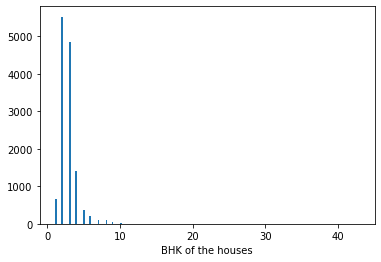

In [179]:
plt.hist(df3['BHK'],bins=150,rwidth=0.8)
plt.xlabel('BHK of the houses')

In [180]:
## We can see that there are outliers present in the BHK feature which we will deal later
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

#### Exploring **Total square feet Area**

In [181]:
df3['total_sqft'].unique()
## We can see that there are range of values in the total squarefeet

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [182]:
## defining a function to know abput float values in total_sqft
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [183]:
## the list of values which have range
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.00000,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.69261,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.69261,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.00000,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.00000,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.00000,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.00000,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.69261,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.00000,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.00000,0.0,63.770,2


It is shown above that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter are going to be  drop.


In [184]:
def range_to_sqfeet(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [185]:
df4 = df3.copy()
df4.total_sqft = df4['total_sqft'].apply(range_to_sqfeet)
df4.head(5)

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


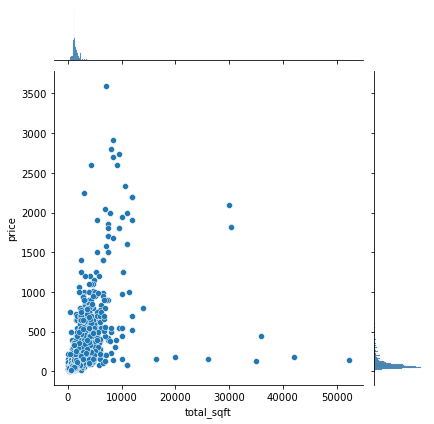

In [186]:
sns.jointplot(y=df4['price'],x=df4['total_sqft'])

### Adding a new feature for Price per square feet

In [187]:
df5 = df4.copy()
df5['price_per_sqft']=round((df4['price']*100000)/df4['total_sqft'],2)

In [188]:
df5['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678300e+02
25%      4.271190e+03
50%      5.438600e+03
75%      7.313320e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [189]:
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.00


### Exploring Categorical feature 

In [190]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats=df5['location'].value_counts().sort_values(ascending=False)
location_stats

Whitefield                                            540
Sarjapur  Road                                        397
Electronic City                                       304
Kanakpura Road                                        273
Thanisandra                                           237
                                                     ... 
Maragondana Halli, kr puram, old madras road            1
Williams Town                                           1
Narayanappa Garden                                      1
Sonam Layout                                            1
bsk 6th stage 2ad block near sri conversation hall      1
Name: location, Length: 1293, dtype: int64

In [191]:
## Total value of locations
location_stats.values.sum()

13303

In [192]:
## Locations with more than 10 labels
len(location_stats[location_stats>10])

241

In [193]:
len(location_stats)

1293

In [194]:
## Locations with less than 10 value counts
len(location_stats[location_stats<=10])

1052

#### Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount.

In [195]:
location_less_than_10=location_stats[location_stats<=10]

In [196]:
len(df5.location.unique())

1293

In [197]:
df5['location']=df5['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

In [198]:
len(df5.location.unique())



242

<AxesSubplot:xlabel='index', ylabel='location'>

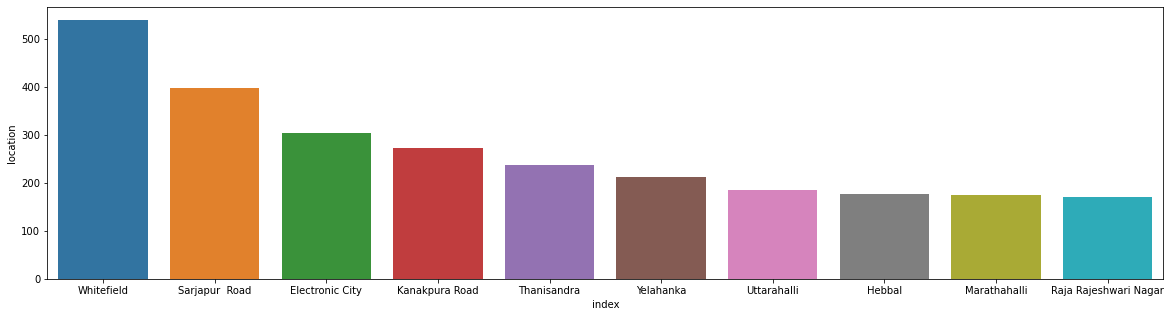

In [199]:
## highest occurance location
plt.figure(figsize=(20,5))
loca=location_stats.head(10).reset_index()
sns.barplot(x=loca['index'],y=loca['location'])


### Outlier Removal Using Business Logic
As per business logic normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [200]:
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.00


#### Handeling square feet feature using BHK

In [201]:
df5[df5['total_sqft']/df5['BHK']<300].head()


,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.00


We can see that the above table includes values based on some erros, so we will remove that

In [202]:
df5.shape

(13303, 8)

In [203]:
df6=df5[~(df5['total_sqft']/df5['BHK']<300)]
df6.shape

(12559, 8)

#### Outlier removal using standard deviation and mean
Implementing this method to the new feature of price per square feet

<AxesSubplot:xlabel='price_per_sqft'>

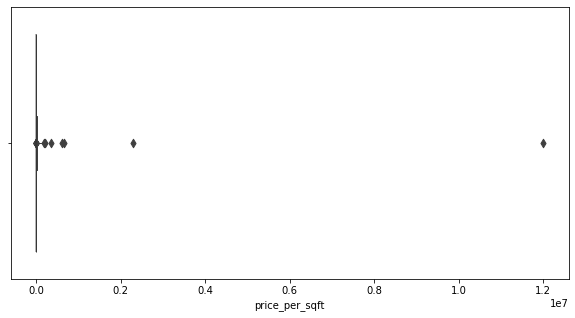

In [204]:
plt.figure(figsize=(10,5))
sns.boxenplot(x=df5['price_per_sqft'])

In [205]:
df5['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678300e+02
25%      4.271190e+03
50%      5.438600e+03
75%      7.313320e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [206]:
df5['price_per_sqft']

0         3699.81
1         4615.38
2         4305.56
3         6245.89
4         4250.00
           ...   
13315     6689.83
13316    11111.11
13317     5258.55
13318    10407.34
13319     3090.91
Name: price_per_sqft, Length: 13303, dtype: float64

In [207]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean= np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10286, 8)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [208]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.rcParams['figure.figsize'] = (8,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    


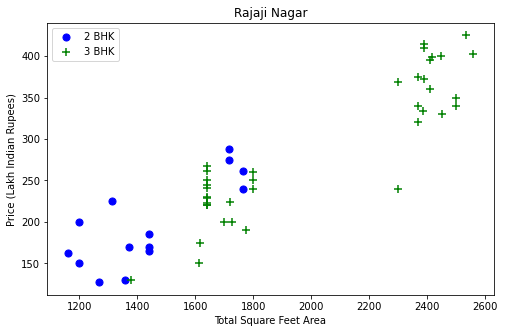

In [209]:
plot_scatter_chart(df7,"Rajaji Nagar")



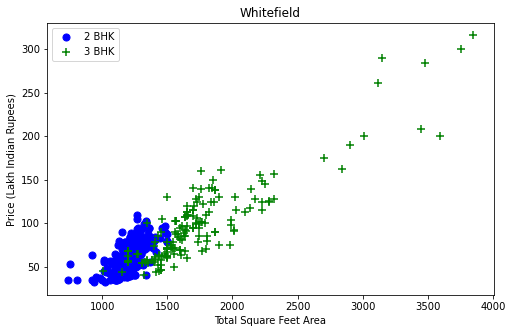

In [210]:
plot_scatter_chart(df7,'Whitefield')

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.


{

    '1' :
    {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    '2' :
    {
        'mean': 4300,
        'std: 2300,
        'count': 22
    }
    ,    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [211]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7353, 8)

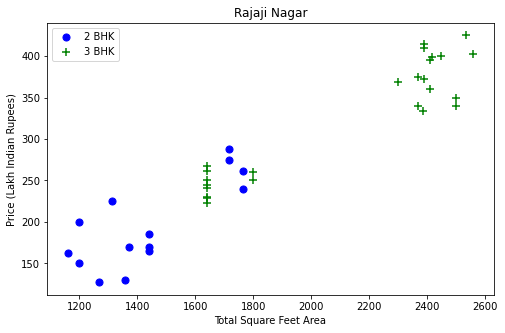

In [212]:
plot_scatter_chart(df8,"Rajaji Nagar")

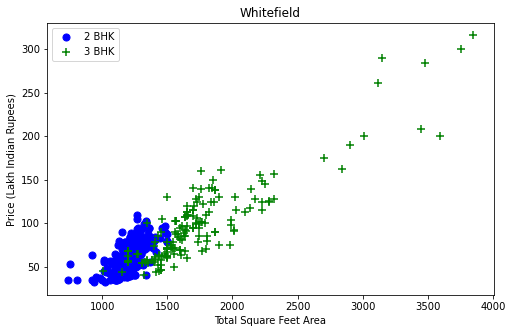

In [213]:
plot_scatter_chart(df7,'Whitefield')

Text(0, 0.5, 'Count')

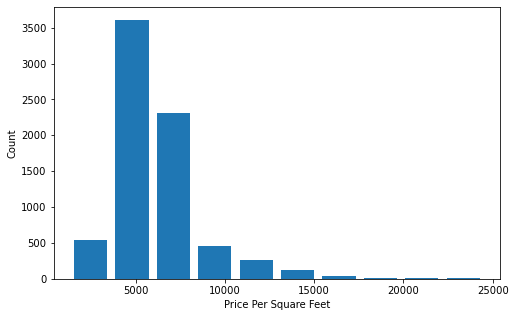

In [214]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Outlier Removal for Bathrooms Feature

In [215]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.00
8530,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.00
8619,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.00
9352,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.00
9683,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.12


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [216]:
df8[df8['bath']>df8['BHK']+2]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.03
5267,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.57
6748,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.03
8455,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.90


If we have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [217]:
df9=df8[df8['bath']<df8['BHK']+2]

In [218]:
df9.shape

(7275, 8)

In [219]:
df9['balcony'].value_counts()

2.0    3026
1.0    2935
3.0     796
0.0     518
Name: balcony, dtype: int64

### Using one hot encoding

In [220]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [221]:
dummies=pd.get_dummies(df10['location'])

In [222]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
df10.head()

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [224]:
df11=pd.concat([df10,dummies.drop('other',axis=1)],axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
df12=df11.drop('location',axis=1)
df12.shape

(7275, 246)

### Model building

In [226]:
X=df12.drop('price',axis=1)
y=df12['price']


In [227]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [228]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8299457669845192

### Using K-fold cross validation to check the accuracy

In [229]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80684523, 0.77182771, 0.86461754, 0.83539538, 0.81804831])

We can see that in 5 iterations we get a score above 80% many times. 

In [230]:
## Function to predict 
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [231]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

87.07114870701079

In [232]:
predict_price('Indira Nagar',1000, 2, 2)

189.61648902783173

In [233]:
predict_price('Indira Nagar',1000, 3, 3)

194.585897605146

We can see our model predicts the value for diffrent houses in Banglore